<a href="https://colab.research.google.com/github/kishusingh413/Hydroclimatic_Extremes_Analysis/blob/main/TermProject_SHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Read CSV file
file_path = 'Daily_temp_data.csv'  # Replace 'example.csv' with the path to your CSV file
df = pd.read_csv(file_path)
df.head()

,YEAR,MONTH,DAY,T2M_MAX,T2M_MIN,T2M_RANGE
0,1982,1,1,24.17,8.84,15.32
1,1982,1,2,25.40,8.51,16.89
2,1982,1,3,26.02,10.08,15.93
3,1982,1,4,27.00,12.34,14.65
4,1982,1,5,26.86,13.41,13.45


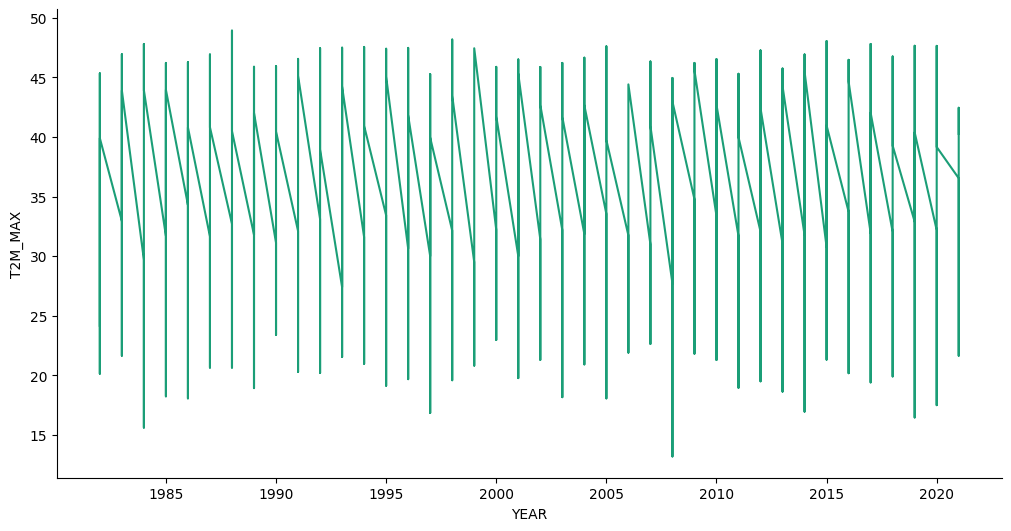

In [ ]:
# @title YEAR vs T2M_MAX

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['YEAR']
  ys = series['T2M_MAX']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('YEAR', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('YEAR')
_ = plt.ylabel('T2M_MAX')

In [ ]:
import pandas as pd

# Assuming you already have your data in a DataFrame called df
# Create a new DataFrame to store the converted data
new_df = pd.DataFrame()

# Combine year, month, and day columns to form a 'Date' column
new_df['Date'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

# Extract 'T2M_MAX' column and rename it as 'Tmax'
new_df['Tmax'] = df['T2M_MAX']

# Display the new DataFrame
print(new_df)
new_df.describe()


            Date   Tmax
0     1982-01-01  24.17
1     1982-01-02  25.40
2     1982-01-03  26.02
3     1982-01-04  27.00
4     1982-01-05  26.86
...          ...    ...
14330 2021-03-27  37.65
14331 2021-03-28  39.33
14332 2021-03-29  40.40
14333 2021-03-30  42.45
14334 2021-03-31  40.26

[14335 rows x 2 columns]


,Date,Tmax
count,14335,14335.000000
mean,2001-08-16 00:00:00,32.945687
min,1982-01-01 00:00:00,13.210000
25%,1991-10-24 12:00:00,28.550000
50%,2001-08-16 00:00:00,31.860000
75%,2011-06-08 12:00:00,37.480000
max,2021-03-31 00:00:00,48.920000
std,NaN,6.253107


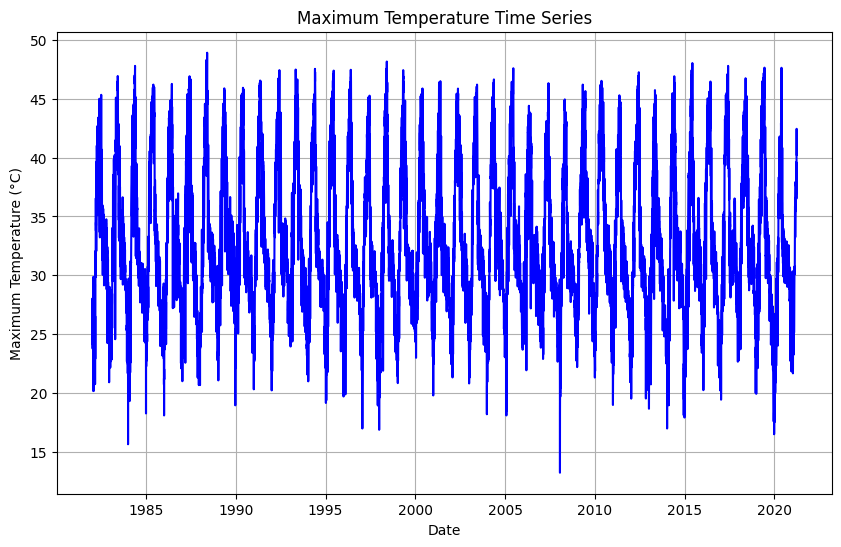

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already created the new DataFrame new_df

# Set the 'Date' column as the index
new_df.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Tmax'], color='b', linestyle='-')
plt.title('Maximum Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature (°C)')
plt.grid(True)
plt.show()


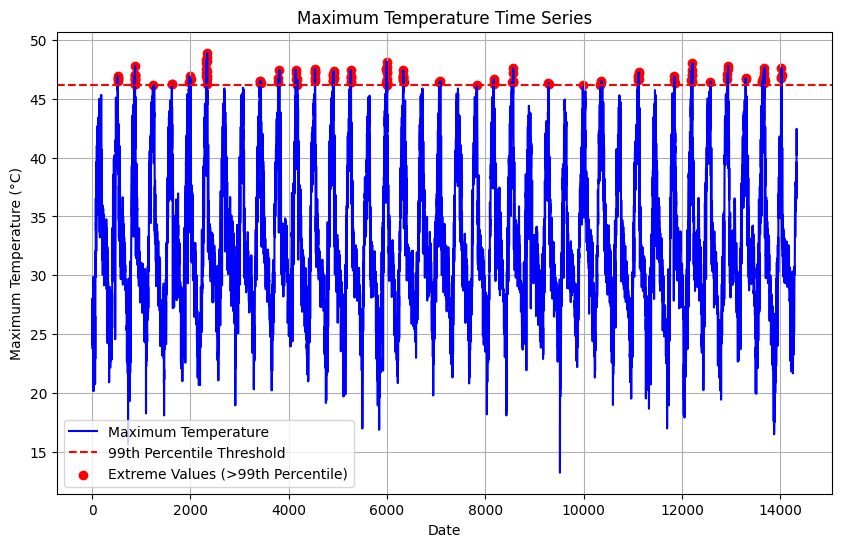

In [ ]:
import matplotlib.pyplot as plt

# Calculate the 95th percentile threshold
threshold = new_df['Tmax'].quantile(0.99)

count_above_threshold = threshold.sum()

# Print the count
print("Number of data points greater than the threshold:", count_above_threshold)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Tmax'], color='b', linestyle='-', label='Maximum Temperature')
plt.axhline(y=threshold, color='r', linestyle='--', label='99th Percentile Threshold')

# Highlight extreme values above the threshold
extreme_values = new_df[new_df['Tmax'] > threshold]
plt.scatter(extreme_values.index, extreme_values['Tmax'], color='red', label='Extreme Values (>99th Percentile)')

plt.title('Maximum Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


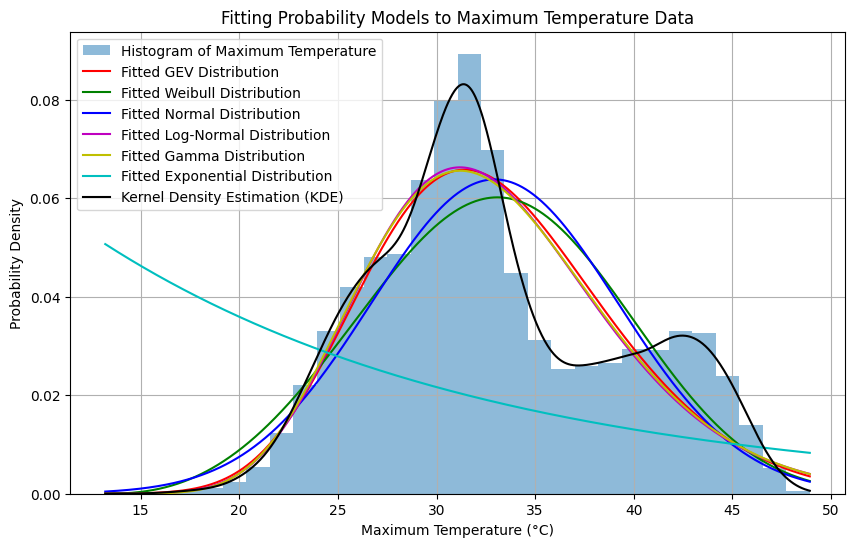

In [ ]:
import numpy as np
from scipy.stats import genextreme, weibull_min, norm, lognorm, gamma, expon, gaussian_kde
import matplotlib.pyplot as plt

# Assuming new_df is your DataFrame with the maximum temperature data

# Extract the maximum temperature values
data = new_df['Tmax'].values

# Fit the Generalized Extreme Value (GEV) distribution
params_gev = genextreme.fit(data)

# Fit the Weibull distribution
params_weibull = weibull_min.fit(data)

# Fit the Normal distribution
params_normal = norm.fit(data)

# Fit the Log-Normal distribution
params_lognormal = lognorm.fit(data)

# Fit the Gamma distribution
params_gamma = gamma.fit(data)

# Fit the Exponential distribution
params_exponential = expon.fit(data)

# Fit the Kernel Density Estimation (KDE)
kde = gaussian_kde(data)

# Generate values from the fitted distributions
x = np.linspace(min(data), max(data), 1000)
y_gev = genextreme.pdf(x, *params_gev)
y_weibull = weibull_min.pdf(x, *params_weibull)
y_normal = norm.pdf(x, *params_normal)
y_lognormal = lognorm.pdf(x, *params_lognormal)
y_gamma = gamma.pdf(x, *params_gamma)
y_exponential = expon.pdf(x, *params_exponential)
y_kde = kde(x)

# Plot the histogram of data and the fitted distributions
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Histogram of Maximum Temperature')
plt.plot(x, y_gev, color='r', linestyle='-', label='Fitted GEV Distribution')
plt.plot(x, y_weibull, color='g', linestyle='-', label='Fitted Weibull Distribution')
plt.plot(x, y_normal, color='b', linestyle='-', label='Fitted Normal Distribution')
plt.plot(x, y_lognormal, color='m', linestyle='-', label='Fitted Log-Normal Distribution')
plt.plot(x, y_gamma, color='y', linestyle='-', label='Fitted Gamma Distribution')
plt.plot(x, y_exponential, color='c', linestyle='-', label='Fitted Exponential Distribution')
plt.plot(x, y_kde, color='k', linestyle='-', label='Kernel Density Estimation (KDE)')
plt.title('Fitting Probability Models to Maximum Temperature Data')
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import genextreme, weibull_min, norm, lognorm, gamma, expon
from scipy import stats
import numpy as np

# Fit the distributions
distributions = {
    'GEV': genextreme,
    'Weibull': weibull_min,
    'Normal': norm,
    'Log-Normal': lognorm,
    'Gamma': gamma,
    'Exponential': expon
}

# Calculate AIC and BIC for each distribution
aic_scores = {}
bic_scores = {}
for name, dist in distributions.items():
    params = dist.fit(data)
    llf = -dist(*params).logpdf(data).sum()
    aic = 2 * len(params) - 2 * llf
    bic = np.log(len(data)) * len(params) - 2 * llf
    aic_scores[name] = aic
    bic_scores[name] = bic

# Print the results
print("Akaike Information Criterion (AIC):")
for name, aic in aic_scores.items():
    print(f"{name}: {aic}")

print("\nBayesian Information Criterion (BIC):")
for name, bic in bic_scores.items():
    print(f"{name}: {bic}")


Akaike Information Criterion (AIC):
GEV: -92552.23953790117
Weibull: -93110.58997699409
Normal: -93230.32519522544
Log-Normal: -92682.27936009355
Gamma: -92645.41787771792
Exponential: -114172.2253427488

Bayesian Information Criterion (BIC):
GEV: -92529.52815976623
Weibull: -93087.87859885914
Normal: -93215.1842764688
Log-Normal: -92659.56798195861
Gamma: -92622.70649958297
Exponential: -114157.08442399217


In [ ]:
# Find the distribution with the lowest AIC and BIC values
best_aic = min(aic_scores, key=aic_scores.get)
best_bic = min(bic_scores, key=bic_scores.get)

# Print the most fitted distribution based on AIC and BIC
print("Most fitted distribution based on AIC:", best_aic)
print("Most fitted distribution based on BIC:", best_bic)

Most fitted distribution based on AIC: Exponential
Most fitted distribution based on BIC: Exponential


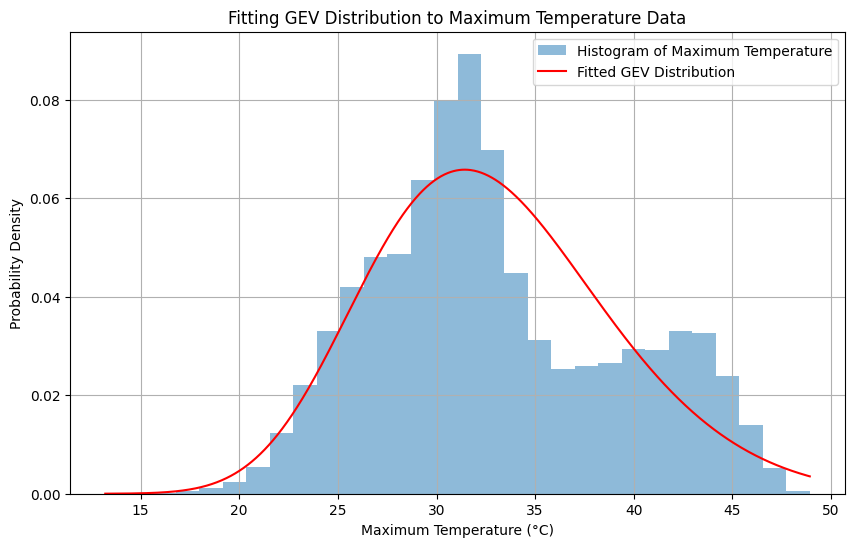

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import genextreme

# Fit the GEV distribution
params_gev = genextreme.fit(data)

# Generate values from the fitted GEV distribution
x_gev = np.linspace(min(data), max(data), 1000)
y_gev = genextreme.pdf(x_gev, *params_gev)

# Plot the histogram of data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Histogram of Maximum Temperature')

# Plot the fitted GEV distribution
plt.plot(x_gev, y_gev, color='r', linestyle='-', label='Fitted GEV Distribution')

plt.title('Fitting GEV Distribution to Maximum Temperature Data')
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the extreme temperature data stored in a variable called 'extreme_temps'

# Sort the extreme temperature data
extreme_temps_sorted = np.sort(params_gev)

# Calculate the probabilities for each data point
probabilities = np.linspace(0, 1, len(extreme_temps_sorted))

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(extreme_temps_sorted, probabilities, marker='.', linestyle='-', color='b')
plt.title('Cumulative Distribution Function (CDF) of Extreme Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


NameError: name 'params_gev' is not defined